# Lecture 3 Part 1 - Linear Equations - Solutions


## Exercise 1 - Gaussian elimination and back substitution

Below you find part of an example program to solve the following set of equations: $$ \left(\begin{array}{cccc} 2 & 1 & 4 & 1 \\ 3 & 4 & -1 & -1 \\ 1 & -4 & 1 & 5 \\ 2 & -2 & 1 & 3 \end{array} \right) \left(\begin{array}{c} w \\ x \\ y \\ z\end{array} \right) = \left(\begin{array}{c} -4 \\ 3 \\ 9 \\ 7\end{array} \right)$$

1. Complete the Gaussian elimination part of the program.
2. Add a print statement that prints the matrix at every step to check that the program is eliminating the lower triangle correctly. You can add a read statement that waits for you to press enter to proceed.
3. Check your final solution for the vector $\mathbf{x}=(w,x,y,z)$ after backsubstitution.


## Talking points

1. What do you observe?
2. Is your solution correct?

In [2]:
from numpy import array,empty

A = array([[ 2,  1,  4,  1 ],
           [ 3,  4, -1, -1 ],
           [ 1, -4,  1,  5 ],
           [ 2, -2,  1,  3 ]], float)
v = array([ -4, 3, 9, 7 ],float)
N = len(v)

print("The original A and v")
print(A,v,"\n")


# Gaussian elimination
for m in range(N):

    # Divide by the diagonal element
    div = A[m,m]
    A[m,:] /= div
    v[m] /= div
    print("Step ",m," of diagonal element division")
    print(A,v,"\n")
    input("Press Enter to continue... \n")

    # Now subtract from the lower rows
    for i in range(m+1,N):
        mult = A[i,m]
        A[i,:] -= mult*A[m,:]
        v[i] -= mult*v[m]
        print("Step ",i," of linear combination")
        print(A,v,"\n")
        input("Press Enter to continue... \n")

print("Doing backsubstitution now")
# Backsubstitution
x = empty(N,float)
for m in range(N-1,-1,-1):
    x[m] = v[m]
    for i in range(m+1,N):
        x[m] -= A[m,i]*x[i]

print("The final answer is: ",x," The correct answer is: 2, -1, -2, 1")


The original A and v
[[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]] [-4.  3.  9.  7.] 

Step  0  of diagonal element division
[[ 1.   0.5  2.   0.5]
 [ 3.   4.  -1.  -1. ]
 [ 1.  -4.   1.   5. ]
 [ 2.  -2.   1.   3. ]] [-2.  3.  9.  7.] 

Press Enter to continue... 

Step  1  of linear combination
[[ 1.   0.5  2.   0.5]
 [ 0.   2.5 -7.  -2.5]
 [ 1.  -4.   1.   5. ]
 [ 2.  -2.   1.   3. ]] [-2.  9.  9.  7.] 

Press Enter to continue... 

Step  2  of linear combination
[[ 1.   0.5  2.   0.5]
 [ 0.   2.5 -7.  -2.5]
 [ 0.  -4.5 -1.   4.5]
 [ 2.  -2.   1.   3. ]] [-2.  9. 11.  7.] 

Press Enter to continue... 

Step  3  of linear combination
[[ 1.   0.5  2.   0.5]
 [ 0.   2.5 -7.  -2.5]
 [ 0.  -4.5 -1.   4.5]
 [ 0.  -3.  -3.   2. ]] [-2.  9. 11. 11.] 

Press Enter to continue... 

Step  1  of diagonal element division
[[ 1.   0.5  2.   0.5]
 [ 0.   1.  -2.8 -1. ]
 [ 0.  -4.5 -1.   4.5]
 [ 0.  -3.  -3.   2. ]] [-2.   3.6 11.  11. ] 

Press Enter to continue... 


## Exercise 2 - LU decomposition

Solve the following set of equations: $$ \left(\begin{array}{cccc} 2 & 1 & 4 & 1 \\ 3 & 4 & -1 & -1 \\ 1 & -4 & 1 & 5 \\ 2 & -2 & 1 & 3 \end{array} \right) \left(\begin{array}{c} w \\ x \\ y \\ z\end{array} \right) = \left(\begin{array}{c} -4 \\ 3 \\ 9 \\ 7\end{array} \right)$$ with LU decomposition. The LU decomposition for the matrix is $$	\mathbf{L}=\left(\begin{array}{cccc}2 & 0 & 0 & 0 \\ 3 & 2.5 & 0 & 0 \\ 1 & -4.5 & -13.6 & 0 \\ 2 & -3 & -11.4 & -1  \end{array} \right) \quad	\mathbf{U}=\left(\begin{array}{cccc}1 & 0.5 & 2 & 0.5 \\ 0 & 1 & -2.8 & -1 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1  \end{array} \right)$$

1. Verify that $\mathbf{LU}$ gives the matrix $\mathbf{A}$. You can use the $\texttt{numpy}$ routine $\texttt{matmul}$.
2. Perform the double back substitution $\mathbf{Ly}=\mathbf{v}$ and $\mathbf{Ux}=\mathbf{y}$ with the $\texttt{numpy.linalg}$ routine $\texttt{solve}$.
3. Verify your result.
4. Apply the LU decomposition to the new vectors $\mathbf{v}_1=(1,0,0,0)$, $\mathbf{v}_2=(0,1,0,0)$, $\mathbf{v}_3=(0,0,1,0)$, and $\mathbf{v}_4=(0,0,0,1)$.
5. Check your result with $\texttt{solve}$.

## Talking points

1. What do you observe?
2. What happens when you apply the LU decomposition to the vectors $\mathbf{v}_1$ to $\mathbf{v}_4$?

In [31]:
from numpy import array,empty,matmul
from numpy.linalg import solve,inv

def backsub(L,U,v):
    y = solve(L,v)
    x = solve(U,y)
    return x

A = array([[ 2,  1,  4,  1 ],
           [ 3,  4, -1, -1 ],
           [ 1, -4,  1,  5 ],
           [ 2, -2,  1,  3 ]], float)
v = array([ -4, 3, 9, 7 ],float)
w1 = array([ 1, 0, 0, 0 ],float)
w2 = array([ 0, 1, 0, 0 ],float)
w3 = array([ 0, 0, 1, 0 ],float)
w4 = array([ 0, 0, 0, 1 ],float)
N = len(v)

L = array([[ 2,  0,  0,  0 ],
           [ 3,  2.5, 0, 0 ],
           [ 1, -4.5,  -13.6,  0 ],
           [ 2, -3,  -11.4,  -1 ]], float)

U = array([[ 1, 0.5,    2,  0.5 ],
           [ 0,   1, -2.8, -1 ],
           [ 0,   0,    1,  0 ],
           [ 0,   0,    0,  1 ]], float)

C = empty([N,N])

print('matrix A: ')
print(A)

print('L: ')
print(L)
print('U: ')
print(U)

B = matmul(L,U)

print('\nExercise part 1')
print('matrix A: ')
print(A)
print('B: ')
print(B)

print('\nExercise part 2 and 3')

# Backsubstitution 1
print("Doing 1st backsubstitution now")    
y = solve(L,v)
print("The vector y is ",y)

print("Doing 2nd backsubstitution now")
# Backsubstitution 2
x = solve(U,y)
d = solve(A,v)

print("The correct answer is: ",d)
print("The final answer is x= ",x," The correct answer is: 2, -1, -2, 1")

print('\nExercise part 4 and 5')

# solving for vectors w1 to w4 now
print("Solving for vector w1= ",w1)
x1 = backsub(L,U,w1)
d = solve(A,w1)
print("The answer for vector w1 is: ",x1)
print("The correct solution is    : ",d)

print("Solving for vector w2= ",w2)
x2 = backsub(L,U,w2)
d = solve(A,w2)
print("The answer for vector w2 is: ",x2)
print("The correct solution is    : ",d)

print("Solving for vector w3= ",w3)
x3 = backsub(L,U,w3)
d = solve(A,w3)
print("The answer for vector w3 is: ",x3)
print("The correct solution is    : ",d)

print("Solving for vector w4= ",w4)
x4 = backsub(L,U,w4)
d = solve(A,w4)
print("The answer for vector w3 is: ",x4)
print("The correct solution is    : ",d)

C[:,0] = x1
C[:,1] = x2
C[:,2] = x3
C[:,3] = x4

D = inv(A)

print('\nChecking the inverse')
print('The matrix X is      : ')
print(C)
print('The inverse should be: ')
print(D)


matrix A: 
[[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]]
L: 
[[  2.    0.    0.    0. ]
 [  3.    2.5   0.    0. ]
 [  1.   -4.5 -13.6   0. ]
 [  2.   -3.  -11.4  -1. ]]
U: 
[[ 1.   0.5  2.   0.5]
 [ 0.   1.  -2.8 -1. ]
 [ 0.   0.   1.   0. ]
 [ 0.   0.   0.   1. ]]

Exercise part 1
matrix A: 
[[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]]
B: 
[[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]]

Exercise part 2 and 3
Doing 1st backsubstitution now
The vector y is  [-2.   3.6 -2.   1. ]
Doing 2nd backsubstitution now
The correct answer is:  [ 2. -1. -2.  1.]
The final answer is x=  [ 2. -1. -2.  1.]  The correct answer is: 2, -1, -2, 1

Exercise part 4 and 5
Solving for vector w1=  [1. 0. 0. 0.]
The answer for vector w1 is:  [-0.11764706  0.17647059  0.23529412  0.11764706]
The correct solution is    :  [-0.11764706  0.17647059  0.23529412  0.11764706]
Solving for vector w2=  [0. 1. 0. 0.]
The answer f

In [ ]:
from numpy.linalg import solve
x = solve(A,v)

In [ ]:
from numpy.linalg import inv
X = inv(A)

## Exercise 3 - Linear spring model

Solve the linear masses connected by springs model $$\left( \begin{array}{cccccc} (\alpha-k) & -k \\ -k & \alpha & -k \\ & -k & \alpha & -k \\ & & \ddots & \ddots & \ddots & \\ & & & -k & \alpha & -k \\ & & & & -k & (\alpha-k) \end{array} \right) \left( \begin{array}{c} x_1 \\ x_2 \\ x_3 \\ \vdots \\ x_{N-1} \\ x_N \end{array} \right) = \left( \begin{array}{c}  C \\ 0 \\ 0 \\ \vdots \\ 0 \\ 0 \end{array} \right) $$ where $\alpha=2k-m\omega^2$ for 26 masses with $C=1$, $m=1$, $k=2$ and $\omega=2$. Below is a skeleton program that calls the subroutine $\texttt{banded}$ for the solution of a banded matrix.

1. Copy the file $\texttt{banded.py}$ from MyCourses to your directory.
2. Complete the program by initializing the problem for the spring model.
3. Add plot statements to plot your results in a graph.

## Talking points

1. What do you observe?
2. What can you say about the amplitudes of the vibrating masses?

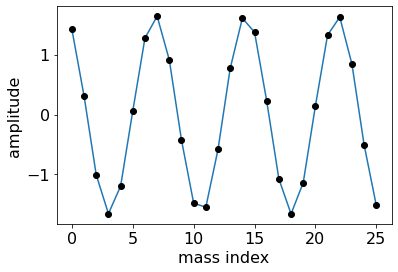

In [35]:
from numpy import empty,zeros
from banded import banded
import matplotlib.pyplot as plt

# Constants
N = 26
C = 1.0
m = 1.0
k = 6.0
omega = 2.0
alpha = 2*k-m*omega*omega

# Set up the initial values of the arrays
A = empty([3,N],float)
for i in range(N):
    A[0,i] = -k
    A[1,i] = alpha
    A[2,i] = -k
A[1,0] = alpha - k
A[1,N-1] = alpha - k

v = zeros(N,float)
v[0] = C

# Solve the equations - call to subroutine
x = banded(A,v,1,1)

# Make a plot using both dots and lines
plt.rc('font',size=16) # set the font size
plt.plot(x)
plt.plot(x,"ko")
plt.xlabel('mass index')
plt.ylabel('amplitude')

plt.show()

Same program with a hand-made solution of the banded matrix problem.

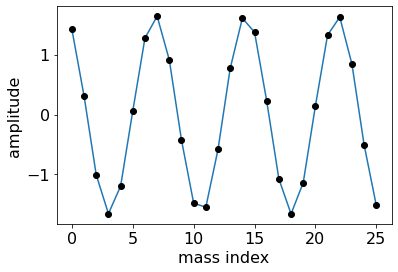

In [6]:
from numpy import empty,zeros
from banded import banded
#from pylab import plot,show
import matplotlib.pyplot as plt

# Constants
N = 26
C = 1.0
m = 1.0
k = 6.0
omega = 2.0
alpha = 2*k-m*omega*omega

# Set up the initial values of the arrays
A = empty([3,N],float)
for i in range(N):
    A[0,i] = -k
    A[1,i] = alpha
    A[2,i] = -k
A[1,0] = alpha - k
A[1,N-1] = alpha - k

v = zeros(N,float)
v[0] = C

# Solve the equations - call to subroutine
x = banded(A,v,1,1)

# Make a plot using both dots and lines
plt.rc('font',size=16) # set the font size
plt.plot(x)
plt.plot(x,"ko")
plt.xlabel('mass index')
plt.ylabel('amplitude')

plt.show()


## Exercise 4 - QR decomposition

The matrix $$\mathbf{A}=\left(\begin{array}{ccc}2 & 6 & 7  \\ 1 & 0 & -1  \\ 2 & 3 & -2    \end{array} \right)$$ has the following QR decomposition: $$\begin{equation*}
	\mathbf{Q}=\frac{1}{3}\left(\begin{array}{cccc}2 & 2 & 1  \\ 1 & -2 & 2  \\ 2 & -1 & -2   \end{array} \right) \quad
	\mathbf{R}=3\left(\begin{array}{cccc}1 & 2 & 1  \\ 0 & 1 & 2  \\ 0 & 0 & 1   \end{array} \right)
\end{equation*} $$

1. Verify that $\mathbf{Q}^T\mathbf{Q}=\mathbb{1}$.
2. Check that $\mathbf{QR}=\mathbf{A}$.

## Talking points

1. What do you observe?

In [65]:
from numpy import array,matmul
from numpy import transpose

A = array([[ 2,  6,  7],
           [ 1,  0, -1],
           [ 2,  3, -2]], float)

Q = array([[ 2,  2,  1],
           [ 1, -2,  2],
           [ 2, -1, -2]], float)
Q = Q/3

R = array([[ 1,  2,  1],
           [ 0,  1,  2],
           [ 0,  0,  1]], float)
R = R*3

print('matrix A: ')
print(A)

print('Q: ')
print(Q)
print('R: ')
print(R)

print('\nExercise part 1 - checking that Q*Q^T=1')
Q2 = transpose(Q)
B = matmul(Q,Q2)
print('matrix Q transpose: ')
print(Q2)
print('Q*Q^T: ')
print(B)

print('\nExercise part 2 - checking that Q*R=A')
B = matmul(Q,R)
print('matrix A: ')
print(A)
print('Q*R: ')
print(B)


matrix A: 
[[ 2.  6.  7.]
 [ 1.  0. -1.]
 [ 2.  3. -2.]]
Q: 
[[ 0.66666667  0.66666667  0.33333333]
 [ 0.33333333 -0.66666667  0.66666667]
 [ 0.66666667 -0.33333333 -0.66666667]]
R: 
[[3. 6. 3.]
 [0. 3. 6.]
 [0. 0. 3.]]

Exercise part 1 - checking that Q*Q^T=1
matrix Q transpose: 
[[ 0.66666667  0.33333333  0.66666667]
 [ 0.66666667 -0.66666667 -0.33333333]
 [ 0.33333333  0.66666667 -0.66666667]]
Q*Q^T: 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Exercise part 2 - checking that Q*R=A
matrix A: 
[[ 2.  6.  7.]
 [ 1.  0. -1.]
 [ 2.  3. -2.]]
Q*R: 
[[ 2.  6.  7.]
 [ 1.  0. -1.]
 [ 2.  3. -2.]]


## Exercise 5 - Eigenvalues and eigenvectors

Diagonalize $$\mathbf{A}=\left(\begin{array}{ccc}2 & 1 & 2  \\ 1 & 0 & 3  \\ 2 & 3 & -2    \end{array} \right)$$

1. Calculate the eigenvalues and eigenvectors of $\mathbf{A}$ using the $\texttt{numpy}$ function $\texttt{eigh}$.
2. Verify that $\mathbf{V}^T\mathbf{AV}=\mathbb{1}$.

## Talking points

1. What do you observe?

In [64]:
from numpy import array,matmul
from numpy.linalg import eigh
from numpy import transpose

A = array([[ 2,  1,  2],
           [ 1,  0,  3],
           [ 2,  3, -2]], float)


print('matrix A: ')
print(A)

print('\nExercise part 3 - eigenvalues of A')
x,V = eig(A)
print('eigenvalues of A: ')
print(x)
print('eigenvectors of A: ')
print(V)

print('\nExercise part 4 - diagonalisation of A')
V2 = transpose(V)
C = matmul(A,V)
D = matmul(V2,C)
print('V^T*A*V: ')
print(D)


matrix A: 
[[ 2.  1.  2.]
 [ 1.  0.  3.]
 [ 2.  3. -2.]]

Exercise part 3 - eigenvalues of A
eigenvalues of A: 
[ 4.1268309   0.22283696 -4.34966785]
eigenvectors of A: 
[[ 0.70149244  0.69023515 -0.17743671]
 [ 0.52239461 -0.66736173 -0.5307845 ]
 [ 0.48478059 -0.27964934  0.82872434]]

Exercise part 4 - diagonalisation of A
V^T*A*V: 
[[ 4.12683090e+00 -4.12864187e-16  0.00000000e+00]
 [-5.55111512e-16  2.22836959e-01  0.00000000e+00]
 [-2.22044605e-16  4.16333634e-16 -4.34966785e+00]]


In [ ]:
from numpy.linalg import eigh,eigvalsh
x,V = eigh(A)
x = eigenvalsh(A)